<a href="https://colab.research.google.com/github/Eduardo775/CENIDET/blob/main/framingham_BALANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Heart Disease Prediction
### ¿Tendrá un paciente un riesgo de 10 años de desarrollar una enfermedad cardiovascular?

### Tabla de contenido
1. [Introducción](#introduction)
2. [Análisis Exploratorio de Datos](#paragraph1)
3. [Selección de características](#paragraph2)
4. [Remuestreo](#paragraph3)
5. [Balance de clases usando SMOOTE](#paragraph5)
6. [Balance de clases SMOOTE & Submuestreo Aleatorio de la clase mayoritaria](#paragraph6)
7. [Aplicando el modelo](#paragraph7)

## Introducción <a name="introduction"></a>

**Problem:**
The World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardiovascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation

**Source:**
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

**Atributos:**

#### Demographic: 
* Sex: male or female(Nominal) 
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 
* Education: no further information provided

#### Behavioral: 
* Current Smoker: whether or not the patient is a current smoker (Nominal) 
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

#### Information on medical history: 
* BP Meds: whether or not the patient was on blood pressure medication (Nominal) 
* Prevalent Stroke (Accidente cerebrovascular prevalente:): whether or not the patient had previously had a stroke (Nominal) 
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 
* Diabetes: whether or not the patient had diabetes (Nominal) 

#### Information on current medical condition: 
* Tot Chol: total cholesterol level (Continuous) 
* Sys BP: systolic blood pressure (Continuous) 
* Dia BP: diastolic blood pressure (Continuous) 
* BMI: Body Mass Index (Continuous) 
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 
* Glucose: glucose level (Continuous) 

#### Target variable to predict: 
* 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)


In [ ]:
# importing libraries and magic functions

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

## Análisis Exploratorio de Datos <a name="paragraph1"></a>

In [195]:
# read data
df = pd.read_csv('./sample_data/FraminghamDatosImputadosEM.csv')

# first glimpse at data
df.head(20)


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,totChol,sysBP,diaBP,BMI,heartRate,Glucose,TenYearCHD
0,0,57,1,0,0,0,0,1,0,233,184.0,106.0,38.88,66,40,1
1,1,43,2,1,43,0,0,0,0,240,126.0,79.0,21.38,88,40,0
2,1,38,4,0,0,0,0,0,0,240,122.5,80.0,23.97,60,43,0
3,1,42,3,1,20,0,0,0,0,231,123.0,87.0,21.48,75,44,0
4,1,59,1,1,40,0,0,1,0,188,111.0,72.0,21.48,75,44,0
5,1,43,2,0,0,0,0,1,0,245,144.5,95.0,27.15,70,45,0
6,0,63,1,0,0,0,0,1,0,252,154.0,87.0,28.60,72,45,0
7,0,59,2,1,15,0,0,1,0,167,156.0,104.0,15.96,72,45,1
8,1,42,1,1,5,0,0,0,0,197,102.0,70.5,24.68,83,45,0
9,1,62,1,0,0,0,0,0,0,157,130.0,87.0,28.73,72,47,0


In [ ]:
# data shape
df.shape


(4240, 16)

In [ ]:

# data types
df.dtypes

sex                  int64
age                  int64
education            int64
currentSmoker        int64
cigsPerDay           int64
BPMeds               int64
PrevalentStroke      int64
PrevalentHyp         int64
Diabetes             int64
totChol              int64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
Glucose              int64
TenYearCHD           int64
dtype: object

In [ ]:
# check for dupicates
duplicate_df = df[df.duplicated()]
duplicate_df

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,totChol,sysBP,diaBP,BMI,heartRate,Glucose,TenYearCHD


In [ ]:
# checking for missing values
df.isna().sum()


sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
PrevalentStroke    0
PrevalentHyp       0
Diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
Glucose            0
TenYearCHD         0
dtype: int64

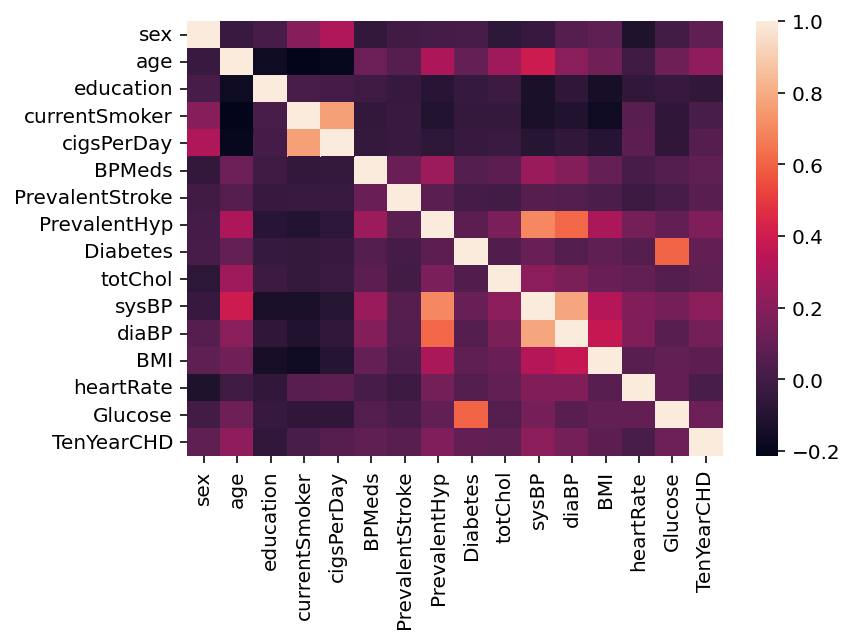

In [ ]:
# checking which features are correlated with each other and are correlated with the outcome variable
df_corr = df.corr()
sns.heatmap(df_corr)

**Conclusions from Heatmap:**

Estamos eliminando la columna *educación* porque un médico tendría que decidir en qué nivel de educación poner a un paciente y esto podría dar lugar a resultados muy subjetivos y además no es muy adecuardo de poner en práctica.



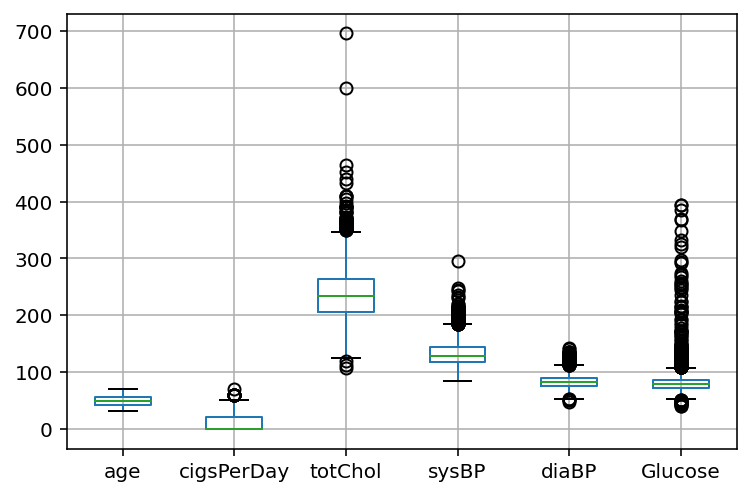

In [ ]:
#Columnas numéricas
numeric_col = ['age','cigsPerDay','totChol','sysBP','diaBP','Glucose']
#numeric_col = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','Glucose']
df.boxplot(numeric_col)

In [196]:
# Dropping columns education
df = df.drop(['education'], axis=1)


In [197]:
#Tratar los valores atípicos
#z-score
# encontrar el valor absoluto de la puntuación z para cada observación
z = np.abs (stats.zscore (df))

# solo mantenga las filas en el marco de datos con todas las puntuaciones z inferiores al valor absoluto de 3 
df = df [(z <3) .all (axis = 1)]

# encontrar cuántas filas quedan en el marco de datos 
df.shape



(3847, 15)

## Selección de Características <a name="paragraph2"></a>

In [ ]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Atributo','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print score

         Atributo       Score
3      cigsPerDay  339.886507
9           sysBP  321.531481
1             age  241.202685
8         totChol  132.052445
10          diaBP   60.692082
6    PrevalentHyp   58.591971
0             sex   20.266895
13        Glucose    7.392637
11            BMI    7.024286
2   currentSmoker    2.332966
12      heartRate    0.772306


In [ ]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Atributo,Score
3,cigsPerDay,339.886507
9,sysBP,321.531481
1,age,241.202685
8,totChol,132.052445
10,diaBP,60.692082
6,PrevalentHyp,58.591971
0,sex,20.266895
13,Glucose,7.392637
11,BMI,7.024286
2,currentSmoker,2.332966


<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Feature importance')

Text(0.5, 0, '\n Features')

Text(0, 0.5, 'Importance \n')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text major ticklabel objects>)

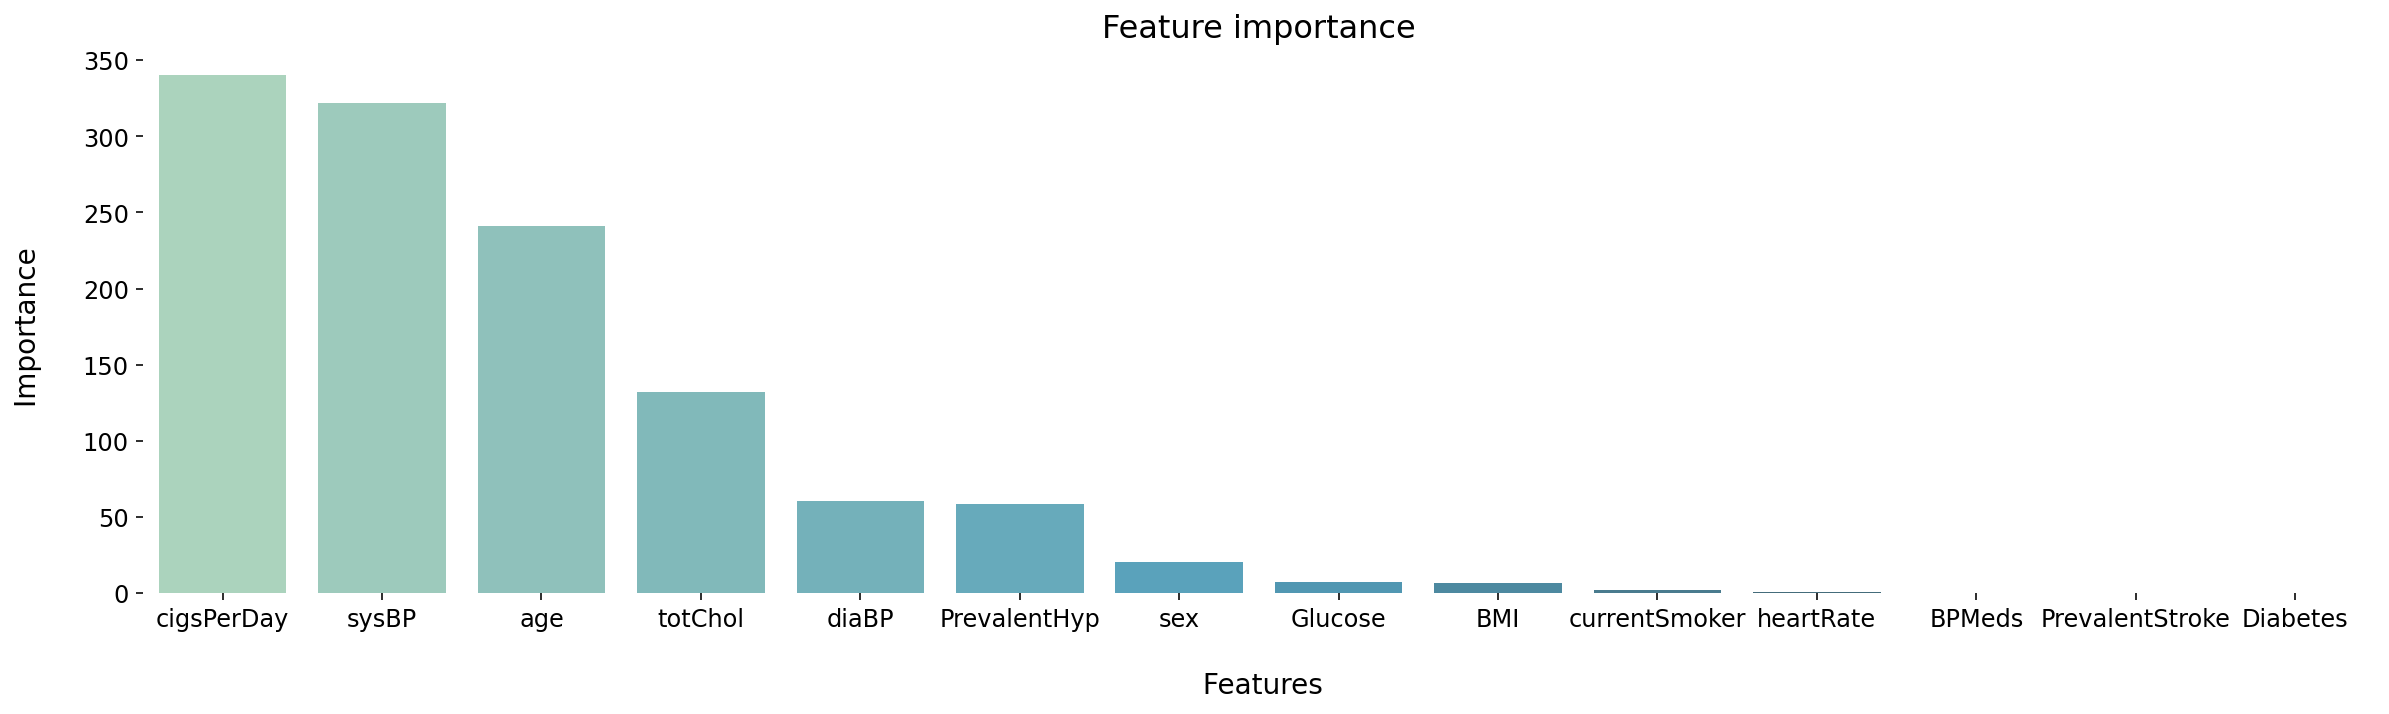

In [ ]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Atributo', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Atributo"].tolist()[:8]
features_list

['cigsPerDay',
 'sysBP',
 'age',
 'totChol',
 'diaBP',
 'PrevalentHyp',
 'sex',
 'Glucose']

Sólo mantendremos las características que tengan la mayor relación con la variable de salida. Estas características son:
- Systolic Blood Pressure
- Glucose
- Age
- Cholesterin
- Cigarettes per Day
- Diastolic Blood Pressure
- PrevalentHyp
- Sex

In [198]:
# Create new dataframe with selected features y la variable objetivo

df = df[['sysBP', 'Glucose','age','totChol','cigsPerDay','diaBP','PrevalentHyp','sex','TenYearCHD']]
df.head()

,sysBP,Glucose,age,totChol,cigsPerDay,diaBP,PrevalentHyp,sex,TenYearCHD
1,126.0,40,43,240,43,79.0,0,1,0
2,122.5,43,38,240,0,80.0,0,1,0
3,123.0,44,42,231,20,87.0,0,1,0
4,111.0,44,59,188,40,72.0,1,1,0
5,144.5,45,43,245,0,95.0,1,1,0


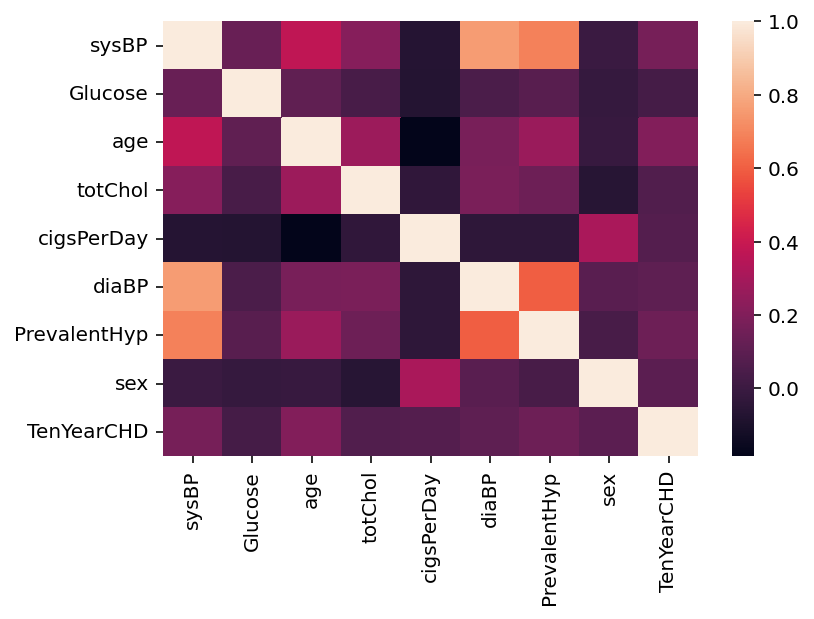

In [ ]:
# Checking correlation again
df_corr = df.corr()
sns.heatmap(df_corr)

Escalamiento de características

Como queremos probar diferentes modelos, y también estos que utilizan la distancia como medida, escalaremos nuestras características.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [ ]:
df_scaled.describe()
df.describe()

Dividir las características de la variable objetivo

In [ ]:
# clarify what is y and what is x label
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

## Remuestreo de conjuntos de datos desequilibrados <a name="paragraph3"></a>

Class 0: 3331
Class 1: 516
Proportion: 6.46 : 1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

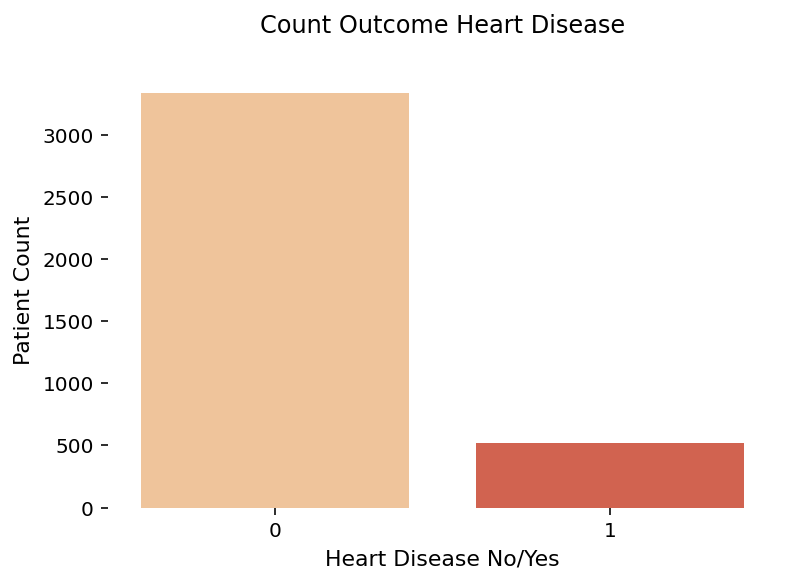

Counter({0: 3331, 1: 516})


In [200]:
# Checking balance of outcome variable
target_count = df.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

#Mostrar un gráfico de barras de la distribución de clases
sns.countplot(df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

#Diagrama de dispersión del conjunto de datos original
import plotly.express as px

# summarize class distribution
counter = Counter(y)
print(counter)

fig = px.scatter(df, x="sysBP", y="diaBP", color="TenYearCHD")
fig.show()

Uno de los principales problemas cuando se trata de conjuntos de datos desequilibrados está relacionado con las métricas utilizadas para evaluar un modelo. El uso de métricas más sencillas, como accuracy_score, puede ser engañoso. En un conjunto de datos con clases muy desequilibradas, si el clasificador siempre "predice" la clase más común sin realizar ningún análisis de las características, seguirá teniendo un alto índice de exactitud, obviamente ilusorio.

### Método de remuestreo 

El submuestreo pretende disminuir el número de casos de la clase sobrerrepresentada en el conjunto de datos. En nuestro caso, estas técnicas disminuirán el número de transacciones fraudulentas en nuestros datos a aproximadamente 50:50. Si no equilibramos el número de instancias, la mayoría de los algoritmos de clasificación se centrarán en gran medida en la clase mayoritaria. Como resultado, podría parecer que su algoritmo está logrando resultados magníficos cuando, en realidad, simplemente está prediciendo siempre la clase mayoritaria.

La forma más sencilla de hacerlo es seleccionar aleatoriamente observaciones de la clase mayoritaria y eliminarlas del conjunto de datos hasta que consigamos un equilibrio entre la clase mayoritaria y la minoritaria.


1    516
0    516
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease after Resampling\n')

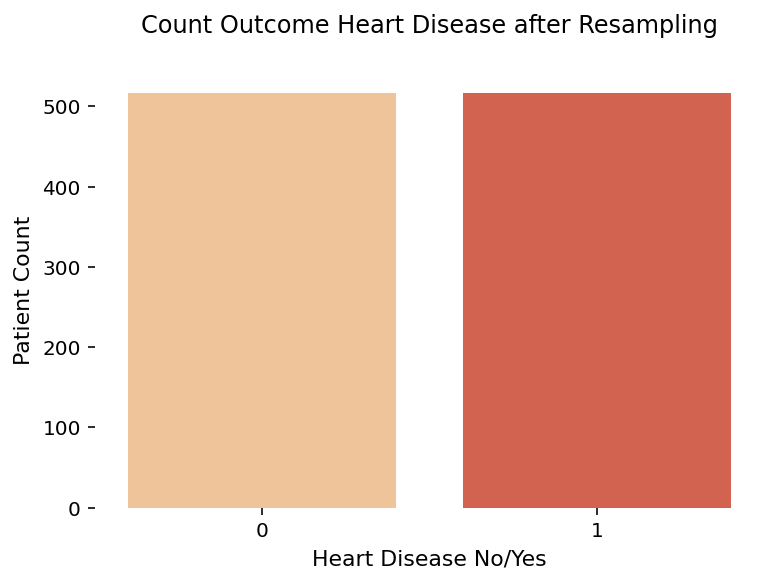

In [208]:
# Shuffle df
df2w=df
shuffled_df = df2w.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Seleccione aleatoriamente 516 observaciones de la clase mayoritaria
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=516,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# Mostramos un diagrama de barras con la distribución de clases ya remuestreadas
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

#Ver el diagrama de dispersión del conjunto de datos ya balanceado
fig = px.scatter(normalized_df, x="sysBP", y="diaBP", color="TenYearCHD")
fig.show()



## Balance de clases SMOOTE <a name="paragraph5"> </a>

In [175]:
import imblearn
print(imblearn.__version__)

0.8.1


In [245]:

# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

# transform the dataset
from imblearn.over_sampling import SMOTE

#copia del conjunto de datos
X1=X
y1=y

counter = Counter(y)
print(counter)

oversampleSMOTE = SMOTE()
X1, y1 = oversampleSMOTE.fit_resample(X1, y1)

# nuevo conjunto de datos 
xx = pd.concat([X1,y1], axis=1,)

# summarize the new class distribution
counter = Counter(y1)
print(counter)

#Ver el diagrama de dispersión del conjunto de datos ya balanceado
fig = px.scatter(xx, x="sysBP", y="diaBP", color="TenYearCHD")
fig.show()


Counter({0: 3331, 1: 516})
Counter({0: 3331, 1: 3331})


## Balance de clases SMOOTE & Submuestreo Aleatorio de la clase mayoritaria <a name="paragraph6"> </a> 

Podemos actualizar el ejemplo para primero sobremuestrear la clase minoritaria para tener un 20 por ciento del número de ejemplos de la clase mayoritaria, luego usar submuestreo aleatorio para reducir el número de ejemplos en la clase mayoritaria para tener un 50 por ciento más que el clase minoritaria 

In [246]:

# Oversample with SMOTE and random undersample for imbalanced dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#copia del conjunto de datos original
X3=X
y3=y

# define pipeline
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

counter = Counter(y)
print(counter)

# transform the dataset
X3, y3 = pipeline.fit_resample(X3, y3)

# nuevo conjunto de datos 
xx2 = pd.concat([X3,y3], axis=1,)

# summarize the new class distribution
counter = Counter(y3)
print(counter)

#Ver el diagrama de dispersión del conjunto de datos ya balanceado
fig = px.scatter(xx2, x="sysBP", y="diaBP", color="TenYearCHD")
fig.show()


Counter({0: 3331, 1: 516})
Counter({0: 1427, 1: 999})


Ejecutar el ejemplo primero crea el conjunto de datos y resume la distribución de clases.

A continuación, el conjunto de datos se transforma, primero sobremuestreando la clase minoritaria y luego submuestreando la clase mayoritaria.

## Balance de clases SMOOTE & Borderline <a name="paragraph7"> </a> 

Consiste en seleccionar aquellas instancias de la clase minoritaria que están mal clasificadas, como con un modelo de clasificación de k-vecino más cercano. Luego, podemos sobremuestrear solo esos casos difíciles, brindando más resolución solo donde sea necesario.

En lugar de generar ciegamente nuevos ejemplos sintéticos para la clase minoritaria, esperaríamos que el método Borderline-SMOTE solo creara ejemplos sintéticos a lo largo del límite de decisión entre las dos clases.



In [247]:
# borderline-SMOTE for imbalanced dataset
 
from imblearn.over_sampling import BorderlineSMOTE

# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversampleBorderlineSMOTE = BorderlineSMOTE()

#copia del conjunto de datos original
X4=X
y4=y

X4, y4 = oversampleBorderlineSMOTE.fit_resample(X4, y4)

# nuevo conjunto de datos 
xx3 = pd.concat([X4,y4], axis=1,)

# summarize the new class distribution
counter = Counter(y4)
print(counter)

#Ver el diagrama de dispersión del conjunto de datos ya balanceado
fig = px.scatter(xx3, x="sysBP", y="diaBP", color="TenYearCHD")
fig.show()

Counter({0: 3331, 1: 516})
Counter({0: 3331, 1: 3331})


## Balance de clases Borderline-SMOTE SVM <a name="paragraph8"> </a> 
Se utiliza una SVM (en lugar de un KNN) para ubicar el límite de decisión definido por los vectores de soporte y los ejemplos en la clase minoritaria que están cerca de los vectores de soporte se convierten en el foco para generar ejemplos sintéticos.

Se crearán aleatoriamente nuevas instancias a lo largo de las líneas que unen cada vector de soporte de clase minoritaria con un número de sus vecinos más cercanos usando la interpolación

In [250]:
# borderline-SMOTE with SVM for imbalanced dataset
 
from imblearn.over_sampling import SVMSMOTE

# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversampleSVMSMOTE = SVMSMOTE()

#copia del conjunto de datos original
X5=X
y5=y

X5, y5 = oversampleSVMSMOTE.fit_resample(X5, y5)

# nuevo conjunto de datos 
xx4 = pd.concat([X5,y5], axis=1,)

# summarize the new class distribution
counter = Counter(y5)
print(counter)

#Ver el diagrama de dispersión del conjunto de datos ya balanceado
fig = px.scatter(xx4, x="sysBP", y="diaBP", color="TenYearCHD")
fig.show()

Counter({0: 3331, 1: 516})
Counter({0: 3331, 1: 3331})


Además de usar una SVM, la técnica intenta seleccionar regiones donde hay menos ejemplos de la clase minoritaria y trata de extrapolar hacia el límite de la clase.


## Balance de clases Adaptive Synthetic Sampling (ADASYN)<a name="paragraph9"> </a> 
implica generar muestras sintéticas inversamente proporcionales a la densidad de los ejemplos en la clase minoritaria. Es decir, generar más ejemplos sintéticos en regiones del espacio de características donde la densidad de ejemplos minoritarios es baja y menos o ninguno donde la densidad es alta.

In [249]:
# Oversample and plot imbalanced dataset with ADASYN
from imblearn.over_sampling import ADASYN

# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversampleADASYN = ADASYN()

#copia del conjunto de datos original
X6=X
y6=y

X6, y6 = oversampleADASYN.fit_resample(X6, y6)

# nuevo conjunto de datos 
xx5 = pd.concat([X6,y6], axis=1,)

# summarize the new class distribution
counter = Counter(y6)
print(counter)

#Ver el diagrama de dispersión del conjunto de datos ya balanceado
fig = px.scatter(xx5, x="sysBP", y="diaBP", color="TenYearCHD")
fig.show()

Counter({0: 3331, 1: 516})
Counter({0: 3331, 1: 3200})


A diferencia de Borderline-SMOTE, podemos ver que los ejemplos que tienen la mayor superposición de clases tienen el mayor enfoque. En problemas en los que estos ejemplos de baja densidad pueden ser valores atípicos, el enfoque ADASYN puede poner demasiada atención en estas áreas del espacio de características, lo que puede resultar en un peor rendimiento del modelo.

## Aplicando el modelo<a name="paragraph9"></a>

In [ ]:
#aquí debemos poner el modelo que mejoreres resultados nos de
def start_questionnaire():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Input Patient Information:')
    
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    male = input("Patient's gender. male=1, female=0: >>> ") 
    my_predictors.append(male)
    cigsPerDay = input("Patient's smoked cigarettes per day: >>> ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Patient's systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    my_predictors.append(diaBP)
    totChol = input("Patient's cholesterin level: >>> ") 
    my_predictors.append(totChol)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(diabetes)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = knn.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
start_questionnaire()

Input Patient Information:


KeyboardInterrupt: ignored